# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [3]:
# Your code here
import pandas as pd
import random

# import random 100000 records from dataset
filename = 'PS_20174392719_1491204439457_log.csv'
# num_lines = sum(1 for l in open(f))
# size = 100001
# skip_idx = random.sample(range(1, num_lines), num_lines - size)
# skip_idx
# df = pd.read_csv(filename, skiprows=skip_idx)
df = pd.read_csv(filename, nrows=100000)
df.shape

(100000, 11)

### What is the distribution of the outcome? 

99884
116


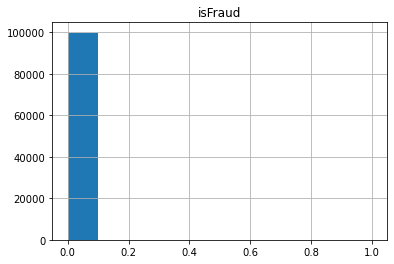

In [4]:
# Your response here
# isFraud - This is the transactions made by the fraudulent agents inside the simulation. 
#  In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or 
#  customers accounts and try to empty the funds by transferring to another account and then cashing out 
#  of the system.
# isFlaggedFraud - The business model aims to control massive transfers from one account to another 
#  and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 
#  200.000 in a single transaction. DON'T USE THIS ONE ...

df.hist('isFraud')
print(len(df[df['isFraud'] == 0]))
print(len(df[df['isFraud'] == 1]))

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [5]:
# Your code here
display(df.head())
display(df.dtypes)
display(df.isnull().sum())
display(df['nameDest'].nunique())
display(df['nameOrig'].nunique())
df.drop(columns=['isFlaggedFraud','nameDest','nameOrig'], inplace=True)
df_dummy = pd.get_dummies(df, columns=['type'])
display(df[(df['isFraud']==1)])
df_dummy
# import seaborn as sns
# sns.heatmap(df.corr(),annot=True, xticklabels = df.corr().columns,yticklabels = df.corr().columns)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

51551

100000

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
251,1,TRANSFER,2806.00,2806.00,0.0,0.00,0.00,1
252,1,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00,1
680,1,TRANSFER,20128.00,20128.00,0.0,0.00,0.00,1
...,...,...,...,...,...,...,...,...
77745,10,CASH_OUT,277970.88,0.00,0.0,0.00,277970.88,1
90070,10,TRANSFER,93810.76,93810.76,0.0,0.00,0.00,1
90071,10,CASH_OUT,93810.76,93810.76,0.0,4096048.05,4189858.81,1
99371,10,TRANSFER,503405.88,503405.88,0.0,0.00,0.00,1


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.00,0.00,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.00,0.00,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,4020.66,159929.0,155908.34,0.00,0.00,0,0,0,0,1,0
99996,10,18345.49,6206.0,0.00,0.00,0.00,0,0,0,0,1,0
99997,10,183774.91,39173.0,222947.91,54925.05,0.00,0,1,0,0,0,0
99998,10,82237.17,6031.0,0.00,592635.66,799140.46,0,0,1,0,0,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [6]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_dummy.drop('isFraud', axis=1)
y = df_dummy['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
# initialize the model
model = LogisticRegression()
# training your model on the training datasets -> where the algorithm will learn
model = model.fit(X_train, y_train)
print('accuracy:',model.score(X_test, y_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))
confusion_matrix(y_test,pred)

accuracy: 0.99888
precision:  0.5714285714285714
recall:  0.13793103448275862
f1:  0.2222222222222222


array([[24968,     3],
       [   25,     4]])

### Now pick a model of your choice and evaluate its accuracy.

In [7]:
# Your code here
# SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =1,sampling_strategy=1.0)
X_train_SMOTE,y_train_SMOTE = sm.fit_sample(X_train,y_train)
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test)
print("precision (smote): ",precision_score(y_test,pred))
print("recall (smote): ",recall_score(y_test,pred))
print("f1 (smote): ",f1_score(y_test,pred))
print(confusion_matrix(y_test,pred))

# OVERSAMPLING
from sklearn.utils import resample
train = pd.concat([X_train, y_train],axis=1)
no_fraud = train[train['isFraud']==0]
yes_fraud = train[train['isFraud']==1]
# oversample minority
yes_fraud_oversampled = resample(yes_fraud, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_fraud),#<- make both sets the same size
                                    random_state=0)
display(no_fraud.shape)
display(yes_fraud_oversampled.shape)
train_oversampled = pd.concat([no_fraud,yes_fraud_oversampled],axis=0)
train_oversampled.head()
y_train_over = train_oversampled['isFraud'].copy()
X_train_over = train_oversampled.drop('isFraud',axis = 1).copy()
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test)

print("precision (os): ",precision_score(y_test,pred))
print("recall (os): ",recall_score(y_test,pred))
print("f1 (os): ",f1_score(y_test,pred))
print(confusion_matrix(y_test,pred))

# UNDERSAMPLING
# undersample majority
no_fraud_undersampled = resample(no_fraud, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(yes_fraud),
                                    random_state=0)
display(yes_fraud.shape)
display(no_fraud_undersampled.shape)
train_undersampled = pd.concat([yes_fraud,no_fraud_undersampled])
train_undersampled.head()
y_train_under = train_undersampled['isFraud'].copy()
X_train_under = train_undersampled.drop('isFraud',axis = 1).copy()
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test)

print("precision (us): ",precision_score(y_test,pred))
print("recall (us): ",recall_score(y_test,pred))
print("f1 (us): ",f1_score(y_test,pred))
print(confusion_matrix(y_test,pred))

precision (smote):  0.011674898967220475
recall (smote):  0.896551724137931
f1 (smote):  0.02304964539007092
[[22770  2201]
 [    3    26]]


(74913, 12)

(74913, 12)

precision (os):  0.009540636042402828
recall (os):  0.9310344827586207
f1 (os):  0.01888772298006296
[[22168  2803]
 [    2    27]]


(87, 12)

(87, 12)

precision (us):  0.008912655971479501
recall (us):  0.8620689655172413
f1 (us):  0.017642907551164433
[[22191  2780]
 [    4    25]]


### Which model worked better and how do you know?

In [ ]:
# Your response here
# false negative are the lowest in the oversampling case (2) -> so if we want to be supersure 
# to catch the most fraud at the price of false positive

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.